In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date
from pandas import datetime
%matplotlib inline
%config IPCompleter.greedy=True
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [0]:
import io

pokemon_data = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))

In [4]:
pokemon_data.head()
#Qty_of_Pokemon = len(pokemon_data)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon_data.describe()
#800 Pokemons
#6 gerações
#Ataque é o mais valorizado em termos médios e std. deviation
#o pokemon mais fraco tem 180 total
#o pokemon mais forte tem 780 de total 
#A defesa e o Sp. Defense têm os valores mais altos 
#existe um pokemon apenas com 1 de Health Points

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Quero saber:
Pokemon Mais Forte em Total
Pokemon Mais Fraco em Total 
Pokemons acima dos 75% 
Geração com Pokemons mais fortes
Geração com Pokemons mais fracos
Geração com mais lendários + Total
Geração com menos lendários + total 

In [0]:
#fig = px.pie(pokemon_data, values=pokemon_data['Type 1'].value_counts(), names='Type 1')
#fig.show()
pokemon_data_piedf = pd.DataFrame(pokemon_data["Type 1"].value_counts())
pokemon_data_piedf.reset_index(inplace=True)
pokemon_data_piedf["Type"] = pokemon_data_piedf["index"]
pokemon_data_piedf.drop(columns="index", inplace=True)

In [7]:
fig = px.pie(pokemon_data_piedf, values="Type 1", names='Type', title = 'Tipos de Pokemon no Universo 800')

fig.show()

In [8]:
strongest_pokemon = pokemon_data['Total'] == 780
pokemon_data[strongest_pokemon]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


Os 3 pokémons mais fortes são os Mewtwo e Rayquaza versão mega

In [9]:
weakest_pokemon = pokemon_data['Total'] == 180
pokemon_data[weakest_pokemon]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [10]:
strong_pokemon_75 = pokemon_data['Total'] > 515
pokemon_data[strong_pokemon_75]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Existem 195 pokemons acima dos 75%

In [11]:
weak_pokemon_25 = pokemon_data['Total'] < 330
pokemon_data[weak_pokemon_25]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
774,704,Goomy,Dragon,NaN,300,45,50,35,55,75,40,6,False
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False


Existem 197 pokemons abaixo dos 25 %. Bastante equilibrado

In [0]:
strong_pokemon_df = pokemon_data[strong_pokemon_75]
weak_pokemon_df = pokemon_data[weak_pokemon_25]

In [0]:
#strong_pokemon_df.groupby('Type 1').count()
str_pok_type1 = strong_pokemon_df['Type 1'].value_counts()
str_pok_type1 = pd.DataFrame(str_pok_type1)
str_pok_type1.reset_index(inplace=True)

In [0]:
wek_pok_type1 = weak_pokemon_df['Type 1'].value_counts()
wek_pok_type1 = pd.DataFrame(wek_pok_type1)
wek_pok_type1.reset_index(inplace=True)

In [15]:
fig0 = go.Figure()
fig0.add_trace(go.Scatter(x= str_pok_type1['index'], y = str_pok_type1['Type 1'],
                    mode='lines',
                    name='Pokemons Above 75'))
fig0.add_trace(go.Scatter( x= str_pok_type1['index'], y = wek_pok_type1['Type 1'],
                    mode='lines+markers',
                    name='Pokemons Bellow 25'))

fig0.update_layout(title='Tipologia do Pokemon acima e abaixo dos percentis - TIPO 1',
                   xaxis_title='Tipo 1',
                   yaxis_title='Pokemon Count')
fig0.show()

In [0]:
str_pok_type2 = strong_pokemon_df['Type 2'].value_counts()
str_pok_type2 = pd.DataFrame(str_pok_type2)
str_pok_type2.reset_index(inplace=True)
wek_pok_type2 = weak_pokemon_df['Type 2'].value_counts()
wek_pok_type2 = pd.DataFrame(wek_pok_type2)
wek_pok_type2.reset_index(inplace=True)

In [17]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x= str_pok_type2['index'], y = str_pok_type2['Type 2'],
                    mode='lines',
                    name='Pokemons Above 75'))
fig1.add_trace(go.Scatter( x= str_pok_type2['index'], y = wek_pok_type2['Type 2'],
                    mode='lines+markers',
                    name='Pokemons Bellow 25'))

fig1.update_layout(title='Tipologia do Pokemon acima e abaixo dos percentis TIPO 2',
                   xaxis_title='Tipo 1',
                   yaxis_title='Pokemon Count')
fig1.show()

In [0]:
strong_null = sum(pd.isnull(strong_pokemon_df['Type 2']))
weak_null = sum(pd.isnull(weak_pokemon_df['Type 2']))

In [19]:
strong_null / len(strong_pokemon_df["Type 2"])*100

35.38461538461539

In [20]:
weak_null / len(weak_pokemon_df["Type 2"])*100

61.92893401015228

61 % dos pokemons abaixo do percentil 25 não têm tipologia 2 
35 % dos pokemons acima do percentil 75 não têm tipologia 1 
é possível verificar que a segunda tipologia auxilia o total de pontos de um pokemons

In [21]:
weak_pokemon_25 = pokemon_data['Total'] < 330
pokemon_data[weak_pokemon_25]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,694,Helioptile,Electric,Normal,289,44,38,33,61,43,70,6,False
774,704,Goomy,Dragon,NaN,300,45,50,35,55,75,40,6,False
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False


In [0]:
new_df_pokemon = pokemon_data[['Generation', 'Total']].copy()
#df.groupby('A').mean()

In [0]:
generation_mean = new_df_pokemon.groupby('Generation').mean()
generation_mean.reset_index(inplace = True)

In [24]:
generation_mean

,Generation,Total
0,1,426.813253
1,2,418.283019
2,3,436.225000
3,4,459.016529
4,5,434.987879
5,6,436.378049


In [25]:
generation_nolen = pokemon_data.loc[(pokemon_data['Legendary'] == 0)]
generation_nolen.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [26]:
new_df_pokemon_nolen = generation_nolen[['Generation', 'Total']].copy()
generation_mean_nolen = new_df_pokemon_nolen.groupby('Generation').mean()
generation_mean_nolen.reset_index(inplace = True)
generation_mean_nolen.head()

,Generation,Total
0,1,417.943750
1,2,408.297030
2,3,409.267606
3,4,437.879630
4,5,416.620000


In [27]:
fig2 = go.Figure()
fig2.add_trace(go.Bar(x= generation_mean['Generation'], y = generation_mean['Total'],
                    name='Mean Total with Legendaries'))
fig2.add_trace(go.Scatter(x= generation_mean['Generation'], y = generation_mean['Total'],
                          mode='lines',
                          name='Mean Total with Legendaries'))

fig2.add_trace(go.Bar( x= generation_mean_nolen['Generation'], y = generation_mean_nolen['Total'],
                    name='Mean Total without Legendaries'))

fig2.update_layout(title='Médias do Total em Cada Geração (With/Without Legendaries)',
                   xaxis_title='Geração',
                   yaxis_title='Média')
fig2.show()

In [28]:

fig3 = px.box(x= pokemon_data['Generation'], y = pokemon_data['Total'], points="all", color = pokemon_data['Generation'])

fig3.update_layout(title='Resultado Total (atk + def + spdef + spatk + spd) em Cada Geração',
                  xaxis_title='Geração',
                  yaxis_title='Total')
fig3.show()


In [0]:
pokemon_generation = pokemon_data['Generation'].value_counts()
pokemon_generation = pd.DataFrame(pokemon_generation)
pokemon_generation.reset_index(inplace=True)

In [0]:
pokemon_generation['Gen'] = pokemon_generation['index']

In [31]:
fig4 = go.Figure()
fig4.add_trace(go.Bar(x= pokemon_generation['Gen'], y = pokemon_generation['Generation'],
                    name='Quantidade', marker_color='indianred'))

fig4.update_layout(title='Quantidade de Pokemons por Geração',
                   xaxis_title='Geração',
                   yaxis_title='QTY')
fig4.show()

verificar se o Total depende dos Lendários e da Geração

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import boxcox

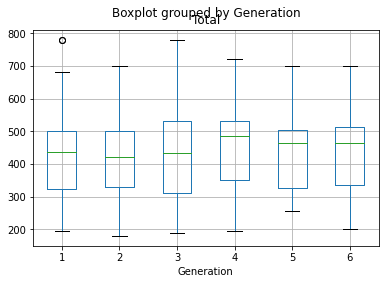

In [32]:
pokemon_data.boxplot('Total', by='Generation')

In [48]:
mod = ols ('Total ~ Legendary*Generation', data=pokemon_data).fit()
aov_table = sm.stats.anova_lm(mod)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Legendary,1.0,2.894883e+06,2.894883e+06,268.006600,3.878874e-52
Generation,1.0,8.062472e+02,8.062472e+02,0.074642,7.847652e-01
Legendary:Generation,1.0,4.802525e+03,4.802525e+03,0.444615,5.050966e-01
Residual,796.0,8.598022e+06,1.080154e+04,NaN,NaN


Não há diferenças significativas entre Geração e Total e Legendary:Geração e Total. Apenas há diferenças no total entre lendários e não lendários. Isto significa que a média dos lendários é superior à dos não lendários - make sense

In [55]:
stat, p = shapiro(pokemon_data['Total'])
print(stat, p)

0.9817469120025635 1.932413695726609e-08


0.970097005367279 9.86052212104127e-12


(array([ 15.,  16.,  37., 116.,  91., 105., 196., 134.,  62.,  28.]),
 array([5.19295685, 5.33959056, 5.48622426, 5.63285797, 5.77949168,
        5.92612539, 6.07275909, 6.2193928 , 6.36602651, 6.51266021,
        6.65929392]),
 <a list of 10 Patch objects>)

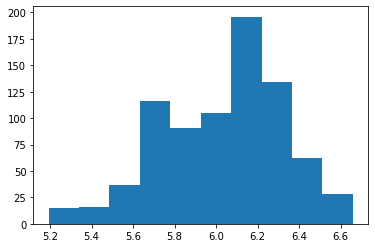

In [66]:
normal_pokemon_total = boxcox(pokemon_data['Total'], 0)
stat, p = shapiro(normal_pokemon_total)
print(stat, p)
plt.hist(normal_pokemon_total)
#lambda = -1. is a reciprocal transform.
#lambda = -0.5 is a reciprocal square root transform.
##lambda = 0.0 is a log transform.
#lambda = 0.5 is a square root transform.

#lambda = 1.0 is no transform.

0.9920048713684082 0.821578860282898


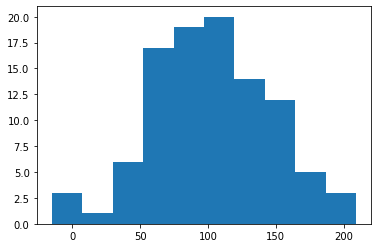

In [68]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 50 * randn(100) + 100
# histogram
stat, p = shapiro(data)
print(stat, p)
pyplot.hist(data)
pyplot.show()

In [0]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter( y = result['confirmados_novos'],
                    mode='lines',
                    name='lines'))
fig2.add_trace(go.Scatter( y = result['modelo'],
                    mode='lines+markers',
                    name='lines+markers'))

fig2.update_layout(title='Comparação do Fitting do Modelo vs. Real',
                   xaxis_title='Data',
                   yaxis_title='Quantidade de Novos Casos')
fig2.show()

In [0]:
fig1 = go.Figure()
fig1.add_trace(go.Bar(x=aid_ict_hour.index, y = aid_ict_hour["ICT's'"]
                    ))
fig1.add_trace(go.Scatter(x=aid_ict_hour.index, y = aid_ict_hour["ICT's'"]
                    ))

fig1.update_layout(title='QTY de Pedidos de Ajuda p/ Hora',
                   xaxis_title='Hora',
                   yaxis_title='Qty Pedidos de Ajuda')
  
fig1.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=6,
            y0=0,
            x1=6,
            y1=60,
            line=dict(
                color="LightSeaGreen",
                width=3
            )))

fig1.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=14,
            y0=0,
            x1=14,
            y1=60,
            line=dict(
                color="LightSeaGreen",
                width=3
            )))

fig1.show()